## Visualize outputs


In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import os,sys,inspect
sys.path.insert(0,"..")

import matplotlib.pyplot as plt
from matplotlib import rc
import glob

macos = False
if macos == True:
    rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Roman']})
    rc('text', usetex=True)

# Font Size
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 30}

import cv2
import numpy as np
import string
import random

In [3]:
def visualize(idx, **images):
    """Plot images in one row.""" 
    n = len(images)
    fig = plt.figure(figsize=(60, 40))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        #if idx==0:
        plt.title(' '.join(name.split('_')).lower(), fontsize=40)
        if i ==0:
            w,h = (1,25)
            fs = 1.0
            color = (0,0,0)
            #color = (255,255,255)
            font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
            cv2.putText(image, str(idx), (w,h), font, fs, color, 1, cv2.LINE_AA)
        if i !=0:
            #plt.imshow(image[:,:,0], cmap='magma')
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image, cmap='gray')
        plt.axis("off")
        #plt.tight_layout()
    plt.savefig("../logs/plots-masked/compare-masked-nyu/{}.png".format(idx), facecolor="white", bbox_inches = 'tight')
    plt.show()
    
    
def make_dataset(dir):
    images = []
    assert os.path.isdir(dir), '%s is not a valid directory' % dir

    f = dir.split('/')[-1].split('_')[-1]
    #print (dir, f)
    dirs= os.listdir(dir)
    for img in dirs:

        path = os.path.join(dir, img)
        #print(path)
        images.append(path)
    return images

def read_image(path):
    image = cv2.imread(path, -1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def read_image_(path):
    image = cv2.imread(path, -1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (192, 256))
    return image

In [4]:
############# GLAS

# # Images and GT

# data_path = "../logs/glas_experiments/"

# GT = "../logs/glas_experiments/glas_exp_best/vis/gts"
# IMG = "../logs/glas_experiments/glas_exp_best/vis/imgs"

# GTS = [os.path.join(GT, x) for x in os.listdir(GT)]
# IMGS = [os.path.join(IMG, x) for x in os.listdir(IMG)]

# len(GTS), len(IMGS)

# # Algo
# preds = "/vis/preds"

# unet = "../logs/glas_experiments/glas_unet" + preds
# lev1 = "../logs/glas_experiments/glas_levit192" + preds
# lev2 = "../logs/glas_experiments/glas_levit384" + preds
# ours1 = "../logs/glas_experiments/glas_levit384_cb_h" + preds
# ours2 = "../logs/glas_experiments/glas_exp_best" + preds


# unet = [os.path.join(unet, x) for x in os.listdir(unet)]
# lev1 = [os.path.join(lev1, x) for x in os.listdir(lev1)]
# lev2 = [os.path.join(lev2, x) for x in os.listdir(lev2)]
# ours1 = [os.path.join(ours1, x) for x in os.listdir(ours1)]
# ours2 = [os.path.join(ours2, x) for x in os.listdir(ours2)]


# ours1[:3]



############# Polyps
# Images and GT

# data_path = "../logs/polyp_experiments/"

# GT = "../logs/polyp_experiments/polys_unet/vis/gts"
# IMG = "../logs/polyp_experiments/polys_unet/vis/imgs"

# GTS = [os.path.join(GT, x) for x in os.listdir(GT)]
# IMGS = [os.path.join(IMG, x) for x in os.listdir(IMG)]

# len(GTS), len(IMGS)

# # Algo
# preds = "/vis/preds"

# unet = "../logs/polyp_experiments/polys_unet" + preds
# lev1 = "../logs/polyp_experiments/polys_levit192" + preds
# lev2 = "../logs/polyp_experiments/polys_levit384" + preds
# ours1 = "../logs/polyp_experiments/polys_levit384_cb_h" + preds
# ours2 = "../logs/polyp_experiments/polys_levit384_cb_ts_h" + preds


# unet = [os.path.join(unet, x) for x in os.listdir(unet)]
# lev1 = [os.path.join(lev1, x) for x in os.listdir(lev1)]
# lev2 = [os.path.join(lev2, x) for x in os.listdir(lev2)]
# ours1 = [os.path.join(ours1, x) for x in os.listdir(ours1)]
# ours2 = [os.path.join(ours2, x) for x in os.listdir(ours2)]


# ours1[:3]

In [5]:
!pwd

/home/hasib/segmentation-context-invariance/notebooks


In [19]:
MASKED_PATH = "../datasets/GLAS/SCRIBBLES"
MASKED_PATHS = sorted(glob.glob(MASKED_PATH + "/*.png"))[::-1][:1000]

In [20]:
MASKED_PATHS[0]

'../datasets/GLAS/SCRIBBLES/11999.png'

In [24]:
images = []
for i in range(20):
    img = read_image(MASKED_PATHS[i])
    images.append(img)
    
images = np.array(images)
images.shape

(20, 512, 512, 3)

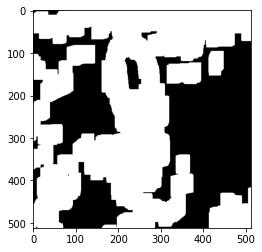

In [25]:
plt.imshow(images[0])

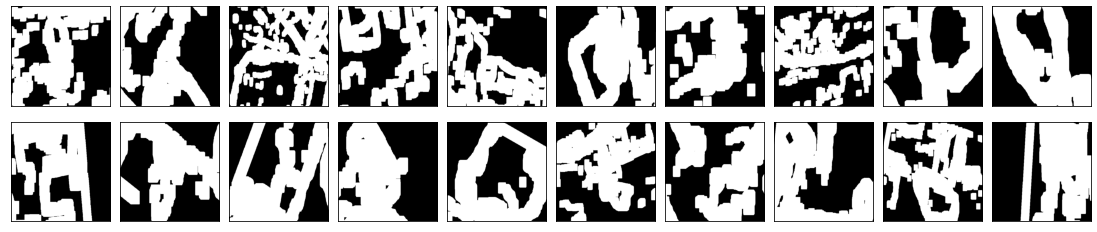

In [65]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image_grid(images, ncols=None, cmap='gray'):
    '''Plot a grid of images'''
    if not ncols:
        factors = [i for i in range(1, len(images)+1) if len(images) % i == 0]
        ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
    nrows = int(len(images) / ncols) + int(len(images) % ncols)
    imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
    f, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2*nrows))
    axes = axes.flatten()[:len(imgs)]
    for img, ax in zip(imgs, axes.flatten()): 
        if np.any(img):
            if len(img.shape) > 2 and img.shape[2] == 1:
                img = img.squeeze()
            ax.imshow(img, cmap=cmap)
            
            # Hide grid lines
            ax.grid(False)

            # Hide axes ticks
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            #f.tight_layout()
            plt.subplots_adjust(left=0.4,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.01)
    plt.savefig("../logs/visualization/qual_masked.pdf", facecolor="white", bbox_inches = 'tight', dpi=300)

# make 16 images with 60 height, 80 width, 3 color channels
#images = np.random.rand(16, 60, 80, 3)

# plot them
plot_image_grid(images,  ncols=10)

### Masked preds vis


In [5]:
############# GLAS

# # Images and GT

data_path = "../logs/glas_experiments/"

GT = "../logs/glas_experiments/glas_exp_best/vis/gts"
IMG = "../logs/glas_experiments/glas_exp_best/vis/imgs"
IMG_M = "../logs/glas_experiments/glas_exp_best/vis_masked/imgs"

GTS = [os.path.join(GT, x) for x in os.listdir(GT)]
IMGS = [os.path.join(IMG, x) for x in os.listdir(IMG)]
IMGS_M = [os.path.join(IMG_M, x) for x in os.listdir(IMG_M)]

# Algo
preds = "/vis_masked/preds"

lev2 = "../logs/glas_experiments/glas_levit384" + preds
ours2 = "../logs/glas_experiments/glas_exp_best" + preds
lev2 = [os.path.join(lev2, x) for x in os.listdir(lev2)]
ours2 = [os.path.join(ours2, x) for x in os.listdir(ours2)]


############# Polyps
# Images and GT

data_path = "../logs/polyp_experiments/"

GT_ = "../logs/polyp_experiments/polys_levit384_cb_ts_h/vis/gts"
IMG_ = "../logs/polyp_experiments/polys_levit384_cb_ts_h/vis/imgs"
IMG_M_ = "../logs/polyp_experiments/polys_levit384_cb_ts_h/vis_masked/imgs"

GTS_ = [os.path.join(GT_, x) for x in os.listdir(GT_)]
IMGS_ = [os.path.join(IMG_, x) for x in os.listdir(IMG_)]
IMGS_M_ = [os.path.join(IMG_M_, x) for x in os.listdir(IMG_M_)]

# Algo
preds = "/vis_masked/preds"

lev2_ = "../logs/polyp_experiments/polys_levit384" + preds
ours2_ = "../logs/polyp_experiments/polys_levit384_cb_ts_h" + preds
lev2_ = [os.path.join(lev2_, x) for x in os.listdir(lev2_)]
ours2_ = [os.path.join(ours2_, x) for x in os.listdir(ours2_)]




############# NYU
# Images and GT

data_path = "../logs/nyu_experiments/"

GT_1 = "../logs/nyu_experiments/nyu_nestunet_cb_ts_h/vis/gts"
IMG_1 = "../logs/nyu_experiments/nyu_nestunet_cb_ts_h/vis/imgs"
IMG_M_1 = "../logs/nyu_experiments/nyu_nestunet_cb_ts_h/vis_masked/imgs"

GTS_1 = [os.path.join(GT_1, x) for x in os.listdir(GT_1)]
IMGS_1 = [os.path.join(IMG_1, x) for x in os.listdir(IMG_1)]
IMGS_M_1 = [os.path.join(IMG_M_1, x) for x in os.listdir(IMG_M_1)]

# Algo
preds = "/vis_masked/preds"

nest_1 = "../logs/nyu_experiments/nyu_nestunet" + preds
ours2_1 = "../logs/nyu_experiments/nyu_nestunet_cb_ts_h" + preds
nest_1 = [os.path.join(nest_1, x) for x in os.listdir(nest_1)]
ours2_1 = [os.path.join(ours2_1, x) for x in os.listdir(ours2_1)]

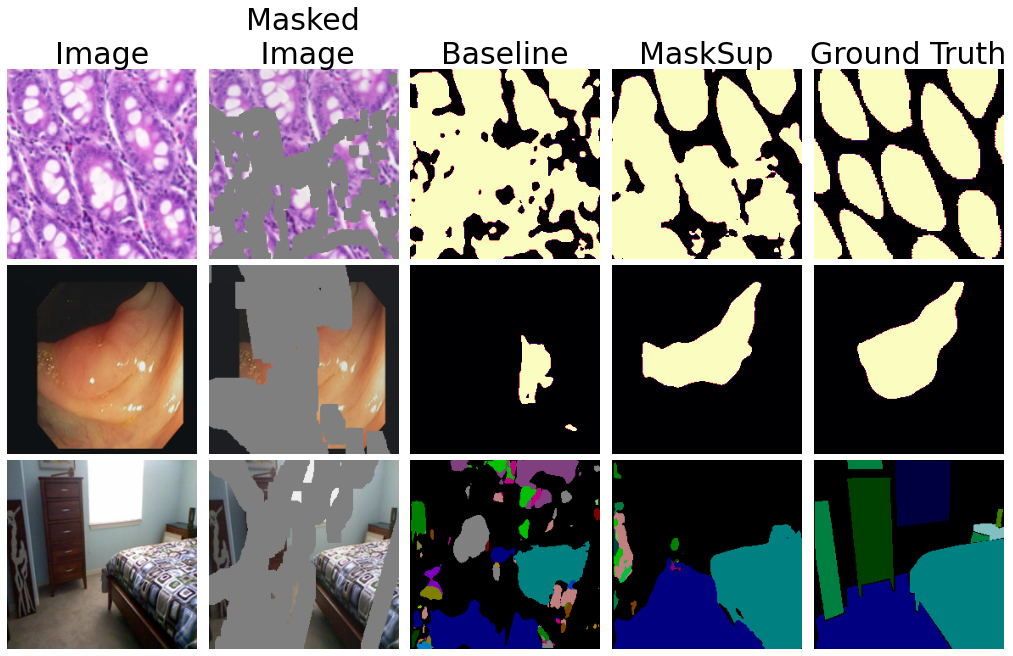

In [12]:
# IMG, IMG_M, GT, lev2, ours2
# IMG_, IMG_M_, GT_, lev2_, ours2_
# IMG_1, IMG_M_1, GT_1, nest_1, ours2_1

#nums = [24, 17, 5, 8, 5, 9]
nums = [17, 5, 5]
#nums = [24, 5, 5, 17, 8, 47]
#nums = [24, 17, 5, 8, 5, 47]


rows = int(len(nums))
cols = 5
fig, axarr = plt.subplots(rows, cols, figsize=(14, 9), constrained_layout=True)


alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)

v = 0
for r in range(rows):
    if r == 0 or r ==3: #r <= 1:
        a=read_image(GTS[nums[v+r]])
        b=read_image(IMGS[nums[v+r]])
        c=read_image(IMGS_M[nums[v+r]])
        w,h = (1,25)
        fs = 1.0
        color = (0,0,0)
        font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
        #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
        d=read_image(lev2[nums[v+r]])
        e=read_image(ours2[nums[v+r]])
    elif r==1 or r==4: #r > 1 and r <=3:
        a=read_image(GTS_[nums[v+r]])
        b=read_image(IMGS_[nums[v+r]])
        c=read_image(IMGS_M_[nums[v+r]])
        w,h = (1,25)
        fs = 1.0
        color = (0,0,0)
        font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
        #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
        d=read_image(lev2_[nums[v+r]])
        e=read_image(ours2_[nums[v+r]])
    else:
        a=read_image(GTS_1[nums[v+r]])
        b=read_image(IMGS_1[nums[v+r]])
        c=read_image(IMGS_M_1[nums[v+r]])
        w,h = (1,25)
        fs = 1.0
        color = (0,0,0)
        font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
        #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
        d=read_image(nest_1[nums[v+r]])
        e=read_image(ours2_1[nums[v+r]])
        
    
    images = [b, c, d, e, a]
    
    captions = ["Image", "Masked\n Image", "Baseline", "MaskSup", "Ground Truth"]
    
    for c in range(cols):
        if c>1:
            if r==2:
                axarr[r, c].imshow(images[c])
            else:
                axarr[r, c].imshow(images[c][:,:,0], cmap='magma')
        else:
            axarr[r, c].imshow(images[c], cmap='gray')
        axarr[r, c].axis("off")
        axarr[r, c].set_aspect('equal') 
        if r==0:
            axarr[r, c].set_title(captions[c], fontsize=30)

plt.savefig("../logs/visualization/qual_masked.pdf", facecolor="white", bbox_inches = 'tight', dpi=300)

### Show all images. algo1, algo2,..., gt

In [48]:
# # # FOr GLAS and Polyps

# i = 0
# for num in range(len(IMGS_1)):
#     visualize(i, 
#               image=read_image(IMGS_1[num]),
#               image_masked=read_image(IMGS_M_1[num]),
#               unetpp=read_image(nest_1[num]),
#               unetpp_cb_ts=read_image(ours2_1[num]),
#               gt=read_image(GTS_1[num]))
#     i+=1

In [49]:
# ############# NYU
# # Images and GT

# data_path = "../logs/nyu_experiments/"

# GT = "../logs/nyu_experiments/nyu_unet/vis/gts"
# IMG = "../logs/nyu_experiments/nyu_unet/vis/imgs"

# GTS = [os.path.join(GT, x) for x in os.listdir(GT)]
# IMGS = [os.path.join(IMG, x) for x in os.listdir(IMG)]

# len(GTS), len(IMGS)

# # Algo
# preds = "/vis/preds"

# unet = "../logs/nyu_experiments/nyu_unet" + preds
# unetp = "../logs/nyu_experiments/nyu_nestunet" + preds
# ours1 = "../logs/nyu_experiments/nyu_nestunet_cb_h" + preds
# ours2 = "../logs/nyu_experiments/nyu_nestunet_cb_ts_h" + preds

# unet = [os.path.join(unet, x) for x in os.listdir(unet)]
# unetp = [os.path.join(unetp, x) for x in os.listdir(unetp)]
# ours1 = [os.path.join(ours1, x) for x in os.listdir(ours1)]
# ours2 = [os.path.join(ours2, x) for x in os.listdir(ours2)]

# ours1[:3]

In [50]:
# # For NYU

# i = 0
# for num in range(len(IMGS)):
#     visualize(i, 
#               image=read_image(IMGS[num]),
#               unet=read_image(unet[num]),
#               unetplusplus=read_image(unetp[num]),
#               unetpp_cb=read_image(ours1[num]),
#               unetpp_cb_ts=read_image(ours2[num]),
#               gt=read_image(GTS[num]))
#     i+=1

In [51]:
# # Images and GT

data_path = "../logs/glas_experiments/"

GT1 = "../logs/glas_experiments/glas_exp_best/vis/gts"
IMG1 = "../logs/glas_experiments/glas_exp_best/vis/imgs"

GTS1 = [os.path.join(GT1, x) for x in os.listdir(GT1)]
IMGS1 = [os.path.join(IMG1, x) for x in os.listdir(IMG1)]


# Algo
preds = "/vis/preds"

unet1 = "../logs/glas_experiments/glas_unet" + preds
lev11 = "../logs/glas_experiments/glas_levit192" + preds
lev21 = "../logs/glas_experiments/glas_levit384" + preds
ours11 = "../logs/glas_experiments/glas_levit384_cb_h" + preds
ours21 = "../logs/glas_experiments/glas_exp_best" + preds


unet1 = [os.path.join(unet1, x) for x in os.listdir(unet1)]
lev11 = [os.path.join(lev11, x) for x in os.listdir(lev11)]
lev21 = [os.path.join(lev21, x) for x in os.listdir(lev21)]
ours11 = [os.path.join(ours11, x) for x in os.listdir(ours11)]
ours21 = [os.path.join(ours21, x) for x in os.listdir(ours21)]



data_path = "../logs/polyp_experiments/"

GT2 = "../logs/polyp_experiments/polys_unet/vis/gts"
IMG2 = "../logs/polyp_experiments/polys_unet/vis/imgs"

GTS2 = [os.path.join(GT2, x) for x in os.listdir(GT2)]
IMGS2 = [os.path.join(IMG2, x) for x in os.listdir(IMG2)]


# Algo
preds = "/vis/preds"

unet2 = "../logs/polyp_experiments/polys_unet" + preds
lev12 = "../logs/polyp_experiments/polys_levit192" + preds
lev22 = "../logs/polyp_experiments/polys_levit384" + preds
ours12 = "../logs/polyp_experiments/polys_levit384_cb_h" + preds
ours22 = "../logs/polyp_experiments/polys_levit384_cb_ts_h" + preds


unet2 = [os.path.join(unet2, x) for x in os.listdir(unet2)]
lev12 = [os.path.join(lev12, x) for x in os.listdir(lev12)]
lev22 = [os.path.join(lev22, x) for x in os.listdir(lev22)]
ours12 = [os.path.join(ours12, x) for x in os.listdir(ours12)]
ours22 = [os.path.join(ours22, x) for x in os.listdir(ours22)]

### Extensive

In [ ]:
#nums = [24, 17, 5, 8, 5, 9]
#nums = [24, 5, 5]
#nums = [24, 5, 5, 17, 8, 47]
#nums = [24, 17, 5, 8, 5, 47]
nums = [48, 79, 7, 14, 47, 60]

rows = int(len(nums))
cols = 5
fig, axarr = plt.subplots(rows, cols, figsize=(20, 24), constrained_layout=True)


alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)

v = 0
for r in range(rows):
    if r==0 or r==1: #r <= 1:
        #print(GTS1[nums[v+r]], IMGS1[nums[v+r]], IMGS_M[nums[v+r]], lev2[nums[v+r]],ours2[nums[v+r]])
        a=read_image(GTS1[nums[v+r]])
        b=read_image(IMGS1[nums[v+r]])
        c=read_image(IMGS_M[nums[v+r]])
        w,h = (1,25)
        fs = 1.0
        color = (0,0,0)
        font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
        #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
        d=read_image(lev2[nums[v+r]])
        e=read_image(ours2[nums[v+r]])
    elif r > 1 and r <=3:
        a=read_image(GTS_[nums[v+r]])
        b=read_image(IMGS_[nums[v+r]])
        c=read_image(IMGS_M_[nums[v+r]])
        w,h = (1,25)
        fs = 1.0
        color = (0,0,0)
        font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
        #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
        d=read_image(lev2_[nums[v+r]])
        e=read_image(ours2_[nums[v+r]])
    else:
        a=read_image(GTS_1[nums[v+r]])
        b=read_image(IMGS_1[nums[v+r]])
        c=read_image(IMGS_M_1[nums[v+r]])
        w,h = (1,25)
        fs = 1.0
        color = (0,0,0)
        font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
        #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
        d=read_image(nest_1[nums[v+r]])
        e=read_image(ours2_1[nums[v+r]])
        
    
    images = [b, c, d, e, a]
    
    captions = ["Image", "Masked Image", "Baseline", "MaskSup (Ours)", "Ground Truth"]
    
    for c in range(cols):
        if c>1:
            if r>=4:
                axarr[r, c].imshow(images[c])
            else:
                axarr[r, c].imshow(images[c][:,:,0], cmap='magma')
        else:
            axarr[r, c].imshow(images[c], cmap='gray')
        axarr[r, c].axis("off")
        axarr[r, c].set_aspect('equal') 
        if r==0:
            axarr[r, c].set_title(captions[c], fontsize=25)

plt.savefig("../logs/visualization/qual_masked_ext.pdf", facecolor="white", bbox_inches = 'tight', dpi=300)

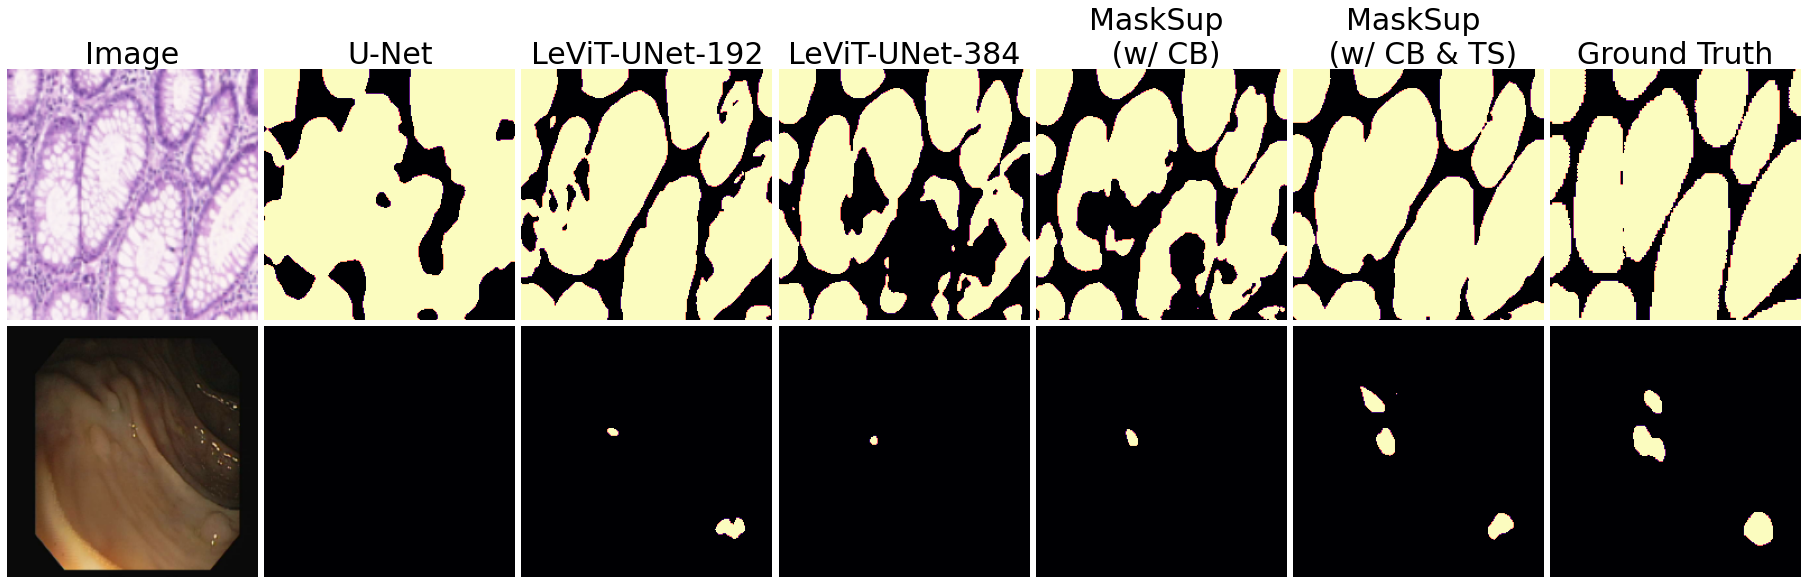

In [55]:
#nums = [40, 53, 4, 11]
nums = [53, 11]

rows = int(len(nums))
cols = 7
fig, axarr = plt.subplots(rows, cols, figsize=(25, 8), constrained_layout=True)


alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)

v = 0
for r in range(rows):
    if r == 0:
        rp1=read_image(GTS1[nums[v+r]])
        tc1=read_image(IMGS1[nums[v+r]])
        w,h = (1,25)
        fs = 1.0
        color = (0,0,0)
        font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
        #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
        a1=read_image(unet1[nums[v+r]])
        a2 = read_image(lev11[nums[v+r]])
        a3=read_image(lev21[nums[v+r]])
        o1=read_image(ours11[nums[v+r]])
        o2=read_image(ours21[nums[v+r]])
    else:
        rp1=read_image(GTS2[nums[v+r]])
        tc1=read_image(IMGS2[nums[v+r]])
        w,h = (1,25)
        fs = 1.0
        color = (0,0,0)
        font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
        #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
        a1=read_image(unet2[nums[v+r]])
        a2 = read_image(lev12[nums[v+r]])
        a3=read_image(lev22[nums[v+r]])
        o1=read_image(ours12[nums[v+r]])
        o2=read_image(ours22[nums[v+r]])
        
    
    images = [tc1, a1, a2, a3, o1, o2, rp1]
    
    captions = ["Image", "U-Net", "LeViT-UNet-192", "LeViT-UNet-384", "MaskSup \n (w/ CB)", "MaskSup \n (w/ CB & TS)", "Ground Truth"]
    
    for c in range(cols):
        if c!=0:
            axarr[r, c].imshow(images[c][:,:,0], cmap='magma')
        else:
            axarr[r, c].imshow(images[c], cmap='gray')
        axarr[r, c].axis("off")
        axarr[r, c].set_aspect('equal') 
        if r==0:
            axarr[r, c].set_title(captions[c], fontsize=30)

plt.savefig("../logs/visualization/qual1.pdf", facecolor="white", bbox_inches = 'tight', dpi=300)

### Extensive

In [ ]:
#nums = [40, 53, 4, 11]
nums = [2,8,48,50,64,71,76,79]

rows = int(len(nums))
cols = 7
fig, axarr = plt.subplots(rows, cols, figsize=(20, 23), constrained_layout=True)


alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)

v = 0
for r in range(rows):
    if r <= 1:
        rp1=read_image(GTS1[nums[v+r]])
        tc1=read_image(IMGS1[nums[v+r]])
        w,h = (1,25)
        fs = 1.0
        color = (0,0,0)
        font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
        #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
        a1=read_image(unet1[nums[v+r]])
        a2 = read_image(lev11[nums[v+r]])
        a3=read_image(lev21[nums[v+r]])
        o1=read_image(ours11[nums[v+r]])
        o2=read_image(ours21[nums[v+r]])
    else:
        rp1=read_image(GTS1[nums[v+r]])
        tc1=read_image(IMGS1[nums[v+r]])
        w,h = (1,25)
        fs = 1.0
        color = (0,0,0)
        font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
        #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
        a1=read_image(unet1[nums[v+r]])
        a2 = read_image(lev11[nums[v+r]])
        a3=read_image(lev21[nums[v+r]])
        o1=read_image(ours11[nums[v+r]])
        o2=read_image(ours21[nums[v+r]])
        
    
    images = [tc1, a1, a2, a3, o1, o2, rp1]
    
    captions = ["Image", "U-Net", "LeViT-UNet-192", "LeViT-UNet-384", "MaskSup \n (w/ CB)", "MaskSup \n (w/ CB & TS)", "Ground Truth"]
    
    for c in range(cols):
        if c!=0:
            axarr[r, c].imshow(images[c][:,:,0], cmap='magma')
        else:
            axarr[r, c].imshow(images[c], cmap='gray')
        axarr[r, c].axis("off")
        axarr[r, c].set_aspect('equal') 
        if r==0:
            axarr[r, c].set_title(captions[c], fontsize=20)

plt.savefig("../logs/visualization/qual_glas_ext.pdf", facecolor="white", bbox_inches = 'tight', dpi=300)

In [ ]:
#nums = [40, 53, 4, 11]
nums = [4, 11, 20, 31, 54]

rows = int(len(nums))
cols = 7
fig, axarr = plt.subplots(rows, cols, figsize=(20, 15), constrained_layout=True)


alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)

v = 0
for r in range(rows):
    if r <= 1:
        rp1=read_image(GTS2[nums[v+r]])
        tc1=read_image(IMGS2[nums[v+r]])
        w,h = (1,25)
        fs = 1.0
        color = (0,0,0)
        font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
        #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
        a1=read_image(unet2[nums[v+r]])
        a2 = read_image(lev12[nums[v+r]])
        a3=read_image(lev22[nums[v+r]])
        o1=read_image(ours12[nums[v+r]])
        o2=read_image(ours22[nums[v+r]])
    else:
        rp1=read_image(GTS2[nums[v+r]])
        tc1=read_image(IMGS2[nums[v+r]])
        w,h = (1,25)
        fs = 1.0
        color = (0,0,0)
        font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
        #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
        a1=read_image(unet2[nums[v+r]])
        a2 = read_image(lev12[nums[v+r]])
        a3=read_image(lev22[nums[v+r]])
        o1=read_image(ours12[nums[v+r]])
        o2=read_image(ours22[nums[v+r]])
        
    
    images = [tc1, a1, a2, a3, o1, o2, rp1]
    
    captions = ["Image", "U-Net", "LeViT-UNet-192", "LeViT-UNet-384", "MaskSup \n (w/ CB)", "MaskSup \n (w/ CB & TS)", "Ground Truth"]
    
    for c in range(cols):
        if c!=0:
            axarr[r, c].imshow(images[c][:,:,0], cmap='magma')
        else:
            axarr[r, c].imshow(images[c], cmap='gray')
        axarr[r, c].axis("off")
        axarr[r, c].set_aspect('equal') 
        if r==0:
            axarr[r, c].set_title(captions[c], fontsize=21)

plt.savefig("../logs/visualization/qual_polyp_ext.pdf", facecolor="white", bbox_inches = 'tight', dpi=300)

In [56]:
############# NYU
# Images and GT

data_path = "../logs/nyu_experiments/"

GT = "../logs/nyu_experiments/nyu_unet/vis/gts"
IMG = "../logs/nyu_experiments/nyu_unet/vis/imgs"

GTS = [os.path.join(GT, x) for x in os.listdir(GT)]
IMGS = [os.path.join(IMG, x) for x in os.listdir(IMG)]

len(GTS), len(IMGS)

# Algo
preds = "/vis/preds"

unet = "../logs/nyu_experiments/nyu_unet" + preds
unetp = "../logs/nyu_experiments/nyu_nestunet" + preds
ours1 = "../logs/nyu_experiments/nyu_nestunet_cb_h" + preds
ours22 = "../logs/nyu_experiments/nyu_nestunet_cb_ts_h" + preds

unet = [os.path.join(unet, x) for x in os.listdir(unet)]
unetp = [os.path.join(unetp, x) for x in os.listdir(unetp)]
ours1 = [os.path.join(ours1, x) for x in os.listdir(ours1)]
ours22 = [os.path.join(ours22, x) for x in os.listdir(ours22)]

ours1[:3]

['../logs/nyu_experiments/nyu_nestunet_cb_h/vis/preds/193.png',
 '../logs/nyu_experiments/nyu_nestunet_cb_h/vis/preds/108.png',
 '../logs/nyu_experiments/nyu_nestunet_cb_h/vis/preds/396.png']

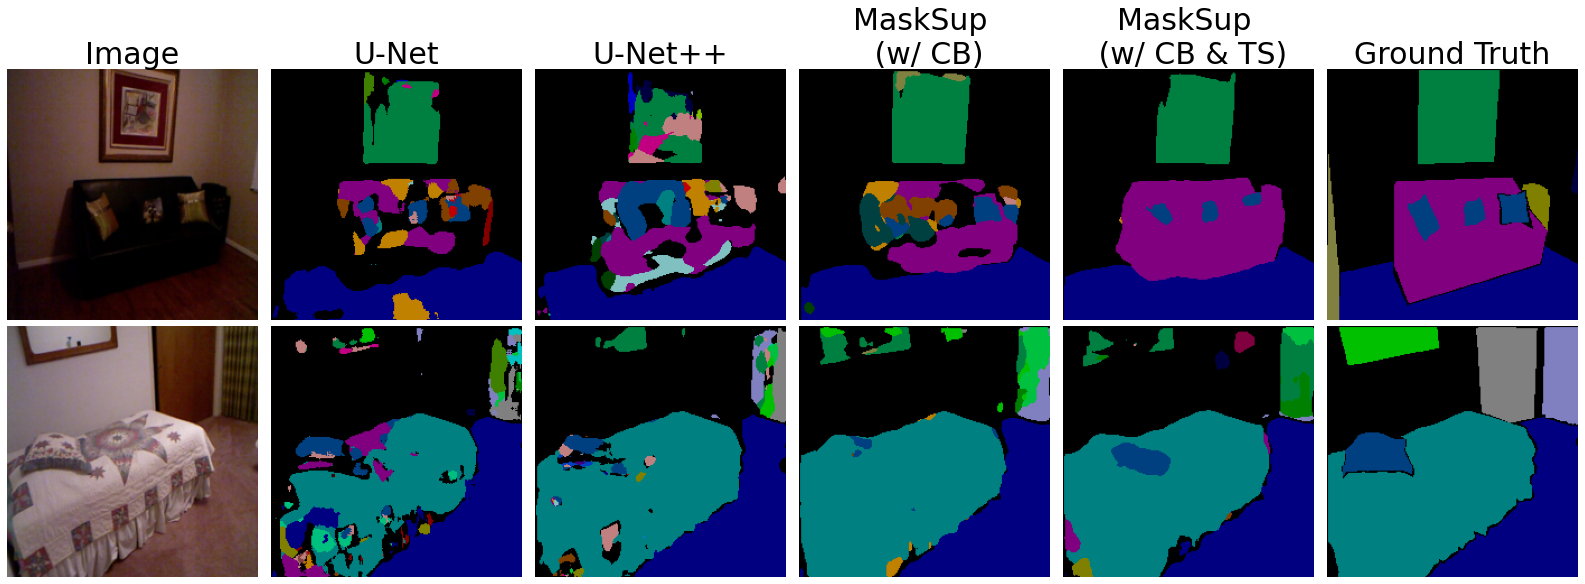

In [72]:
#nums = [249,31,53, 237]
nums = [31, 237]
rows = int(len(nums))
cols = 6
fig, axarr = plt.subplots(rows, cols, figsize=(22, 8), constrained_layout=True)


alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)

v = 0
for r in range(rows):
    rp1=read_image(GTS[nums[v+r]])
    tc1=read_image(IMGS[nums[v+r]])
    w,h = (1,25)
    fs = 1.0
    color = (0,0,0)
    font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
    #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
    a1=read_image(unet[nums[v+r]])
    a2 = read_image(unetp[nums[v+r]])
    o1=read_image(ours1[nums[v+r]])
    o2=read_image(ours22[nums[v+r]])
        
    
    images = [tc1, a1, a2, o1, o2, rp1]
    
    captions = ["Image", "U-Net", "U-Net++", "MaskSup \n (w/ CB)", "MaskSup \n (w/ CB & TS)", "Ground Truth"]
    
    for c in range(cols):
        axarr[r, c].imshow(images[c], cmap='gray')
        axarr[r, c].axis("off")
        axarr[r, c].set_aspect('equal') 
        if r==0:
            axarr[r, c].set_title(captions[c], fontsize=30)

plt.savefig("../logs/visualization/qual2.pdf", facecolor="white", bbox_inches = 'tight', dpi=300)

### Extensive

In [ ]:
#nums = [249,31,53, 237]
nums = [18, 117, 195, 212, 224,233,239]

rows = int(len(nums))
cols = 6
fig, axarr = plt.subplots(rows, cols, figsize=(21, 25), constrained_layout=True)


alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)

v = 0
for r in range(rows):
    rp1=read_image(GTS[nums[v+r]])
    tc1=read_image(IMGS[nums[v+r]])
    w,h = (1,25)
    fs = 1.0
    color = (0,0,0)
    font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
    #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
    a1=read_image(unet[nums[v+r]])
    a2 = read_image(unetp[nums[v+r]])
    o1=read_image(ours1[nums[v+r]])
    o2=read_image(ours22[nums[v+r]])
        
    
    images = [tc1, a1, a2, o1, o2, rp1]
    
    captions = ["Image", "U-Net", "U-Net++", "MaskSup \n (w/ CB)", "MaskSup \n (w/ CB & TS)", "Ground Truth"]
    
    for c in range(cols):
        axarr[r, c].imshow(images[c], cmap='gray')
        axarr[r, c].axis("off")
        axarr[r, c].set_aspect('equal') 
        if r==0:
            axarr[r, c].set_title(captions[c], fontsize=25)

plt.savefig("../logs/visualization/qual_nyu_ext.pdf", facecolor="white", bbox_inches = 'tight', dpi=300)

In [ ]:

rows = 1
cols = 6
fig, axarr = plt.subplots(1,6, figsize=(21, 15), constrained_layout=True)


alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)

for r in range(rows):
    w,h = (10,210)
    fs = 1.0
    color = (0,255,0)
    font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
    #cv2.putText(tc1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
    
    rp1=read_image('../logs/glas_experiments/glas_exp_best/vis/imgs/13.png')
    #cv2.putText(rp1, str("a)"), (w,h), font, fs, color, 1, cv2.LINE_AA)
    tc1=read_image('../logs/glas_experiments/glas_exp_best/vis/imgs/25.png')
    #cv2.putText(tc1, str("b)"), (w,h), font, fs, color, 1, cv2.LINE_AA)
    a1=read_image(IMGS2[4])
    #cv2.putText(a1, str("c)"), (w,h), font, fs, color, 1, cv2.LINE_AA)
    a2 = read_image('../logs/polyp_experiments/polys_unet/vis/imgs/46.png',)
    #cv2.putText(a2, str("d)"), (w,h), font, fs, color, 1, cv2.LINE_AA)
    o1=read_image(IMGS[3])
    #cv2.putText(o1, str("e)"), (w,h), font, fs, color, 1, cv2.LINE_AA)
    o2=read_image(IMGS[31])
    #cv2.putText(o2, str("f)"), (w,h), font, fs, color, 1, cv2.LINE_AA)


    images = [rp1, tc1, a1, a2, o1, o2]
    for c in range(cols):
        axarr[c].imshow(images[c], cmap='gray')
        axarr[c].axis("off")
        axarr[c].set_aspect('equal') 
        #if r==0:
        #    axarr[r, c].set_title(captions[c], fontsize=30)

plt.savefig("../logs/visualization/hard_images.pdf", facecolor="white", bbox_inches = 'tight', dpi=300)

In [ ]:
import cv2
img = cv2.imread("../logs/visualization/figs/masked_image.png")
img.shape

In [ ]:
plt.imshow(img)

In [ ]:
img_proc = np.where(img != 127, img, 0)
plt.imshow(img_proc)

In [ ]:
cv2.imwrite("../logs/visualization/figs/new_masked_image.png", img_proc)

In [ ]:
mask = None
mask = np.where(img == 127, img, 0)
plt.imshow(mask)

In [ ]:
np.unique(mask)

In [ ]:
mask_inv = np.where(mask == 0, mask, 255)
plt.imshow(mask_inv)

In [ ]:
np.unique(mask_inv)

In [ ]:
cv2.imwrite("../logs/visualization/figs/mask.png", mask_inv)